In [34]:
# import necessary libraries
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import os
import requests
%matplotlib inline


In [21]:
# open csv files using read_csv function
AUDUSD_df = pd.read_csv(
            Path('../Resources/AUDUSD-2000-2020-15m.csv'),
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)
EURCHF_df = pd.read_csv(
            Path('../Resources/EURCHF-2000-2020-15m.csv'), 
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)
EURJPY_df = pd.read_csv(
            Path('../Resources/EURJPY-2000-2020-15m.csv'), 
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)
EURUSD_df = pd.read_csv(
            Path('../Resources/EURUSD-2000-2020-15m.csv'), 
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)
USDCAD_df = pd.read_csv(
            Path('../Resources/USDCAD-2000-2020-15m.csv'), 
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)
USDCHF_df = pd.read_csv(
            Path('../Resources/USDCHF-2000-2020-15m.csv'), 
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)
USDJPY_df = pd.read_csv(
            Path('../Resources/USDJPY-2000-2020-15m.csv'), 
            index_col = 'DATE_TIME', 
            parse_dates=True, 
            infer_datetime_format=True)

In [19]:

# review the first and the last 5 rows for AUDSUD
display(AUDUSD_df.head())
display(AUDUSD_df.tail())

,HIGH,LOW,OPEN,CLOSE
DATE_TIME,,,,
2000-01-03 00:00:00,0.6574,0.6563,0.6563,0.6570
2000-01-03 00:15:00,0.6572,0.6570,0.6572,0.6570
2000-01-03 01:00:00,0.6585,0.6580,0.6580,0.6585
2000-01-03 01:15:00,0.6590,0.6585,0.6589,0.6585
2000-01-03 01:30:00,0.6602,0.6595,0.6595,0.6602


,HIGH,LOW,OPEN,CLOSE
DATE_TIME,,,,
2020-03-19 05:00:00,0.55519,0.55138,0.55518,0.55405
2020-03-19 05:15:00,0.55528,0.55269,0.55406,0.55427
2020-03-19 05:30:00,0.56336,0.55408,0.55427,0.55843
2020-03-19 05:45:00,0.55907,0.55530,0.55846,0.55576
2020-03-19 06:00:00,0.55812,0.55576,0.55576,0.55712


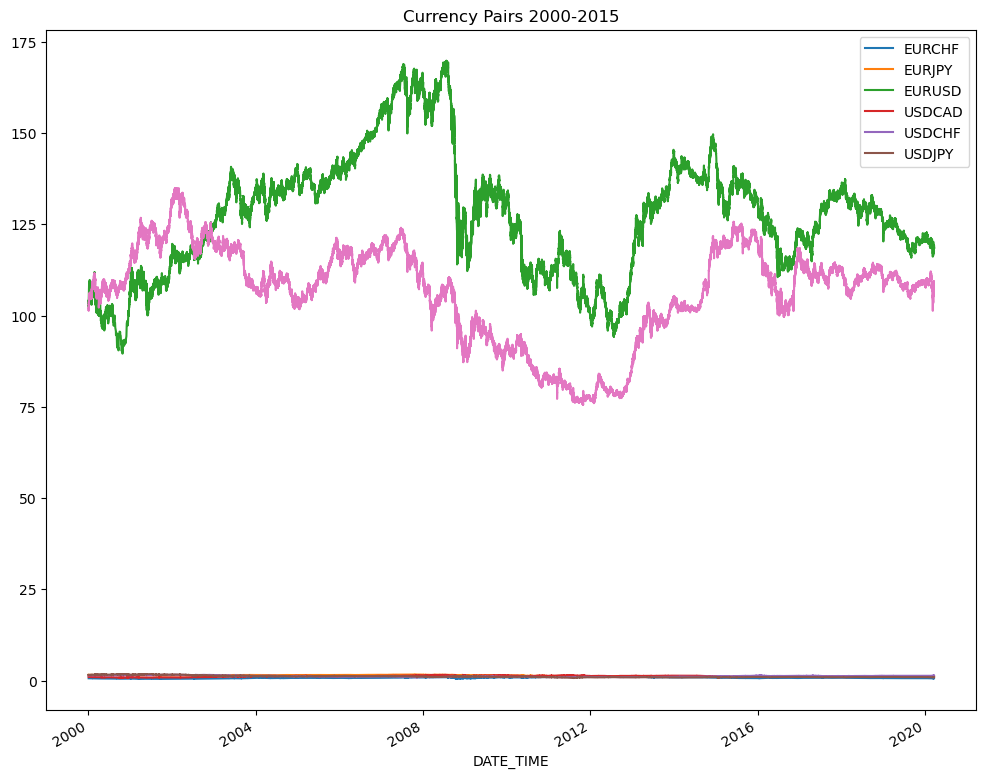

In [28]:
# plot all the data using plot function
ax = AUDUSD_df['CLOSE'].plot(figsize = (12,10), title = "Currency Pairs 2000-2015")
EURCHF_plot = EURCHF_df['CLOSE'].plot(ax=ax)
EURJPY_plot = EURJPY_df['CLOSE'].plot(ax=ax)
EURUSD_plot = EURUSD_df['CLOSE'].plot(ax=ax)
USDCAD_plot = USDCAD_df['CLOSE'].plot(ax=ax)
USDCHF_plot = USDCHF_df['CLOSE'].plot(ax=ax)
USDJPY_plot = USDJPY_df['CLOSE'].plot(ax=ax)

# add a legend to show which line represents which currency pair
ax.legend(["EURCHF", "EURJPY", "EURUSD", "USDCAD", "USDCHF", "USDJPY"])

Halam : I'll skip to getting the market data and calculate rolling 

In [31]:
# load .env variables 
load_dotenv()

True

In [33]:
# set the alpaca API keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key )

str

In [35]:
# create an Alpaca object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [36]:
# set start date and end date and set it in isoformat
start_date = pd.Timestamp("2015-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-03-19", tz="America/New_York").isoformat()


In [49]:
# set tickers and timeframe 
tickers = ['SPY']
timeframe = '1Day'

In [50]:
# call S&P 500 (SPY) data using get_bars
sp500_df = alpaca.get_bars(
          tickers,
          timeframe,
          start = start_date,
          end = end_date
).df

sp500_df.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,209.440,210.8200,209.1100,210.680,97858418,337780,209.921410,SPY
2015-12-02 05:00:00+00:00,210.615,211.0000,208.2300,208.529,108069059,367013,209.563055,SPY
2015-12-03 05:00:00+00:00,208.830,209.1500,204.7511,205.610,166224154,546768,206.878936,SPY
2015-12-04 05:00:00+00:00,206.080,209.9700,205.9300,209.620,192878747,556731,208.178631,SPY
2015-12-07 05:00:00+00:00,209.230,209.7295,207.2000,208.350,102027111,374705,208.276128,SPY


In [51]:
# create a sp500_closing_df variable that only includes the close column
sp500_closing_df = sp500_df['close']
sp500_closing_df.head()

timestamp
2015-12-01 05:00:00+00:00    210.680
2015-12-02 05:00:00+00:00    208.529
2015-12-03 05:00:00+00:00    205.610
2015-12-04 05:00:00+00:00    209.620
2015-12-07 05:00:00+00:00    208.350
Name: close, dtype: float64

In [61]:
# get the data with a rolling window of 50 days
sp500_7dayrolling_df = sp500_closing_df.rolling(window=7).mean().dropna()
sp500_7dayrolling_df.head()

timestamp
2015-12-09 05:00:00+00:00    207.868286
2015-12-10 05:00:00+00:00    207.181143
2015-12-11 05:00:00+00:00    206.231286
2015-12-14 05:00:00+00:00    205.844257
2015-12-15 05:00:00+00:00    205.188657
Name: close, dtype: float64

In [62]:
# get the data with a rolling window of 200 days
sp500_21dayrolling_df = sp500_closing_df.rolling(window=21).mean().dropna()
sp500_21dayrolling_df.head()

timestamp
2015-12-30 05:00:00+00:00    205.670495
2015-12-31 05:00:00+00:00    205.346210
2016-01-04 05:00:00+00:00    204.988600
2016-01-05 05:00:00+00:00    204.786219
2016-01-06 05:00:00+00:00    204.271933
Name: close, dtype: float64

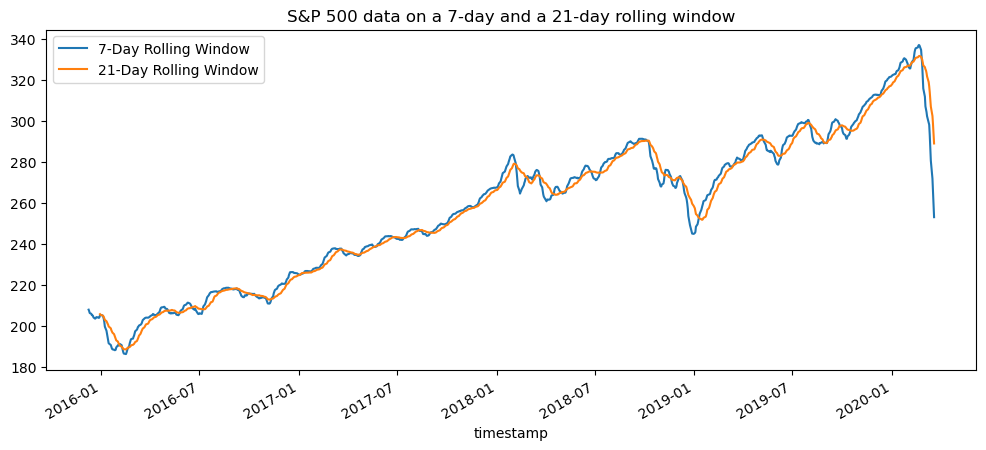

In [63]:
# plot both in the same graph
ax = sp500_7dayrolling_df.plot(title = "S&P 500 data on a 7-day and a 21-day rolling window", figsize = (12,5))
sp500_21dayrolling_df.plot(ax=ax)

ax.legend(["7-Day Rolling Window", "21-Day Rolling Window"])